## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
#data.head()

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = data.groupby("Drug Regimen").count()
summary["Mean"] = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary["Median"] = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary["Variance"] = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary["Standard Dev"] = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary["Sem"] = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary = summary[["Mean","Median","Variance","Standard Dev","Sem"]]
summary

,Mean,Median,Variance,Standard Dev,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

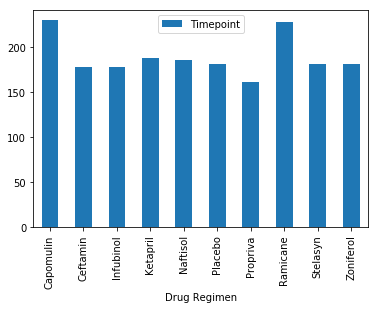

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapoint = data.groupby("Drug Regimen").count()
datapoint = datapoint[["Timepoint"]]
datapoint.plot(kind="bar")
plt.show()

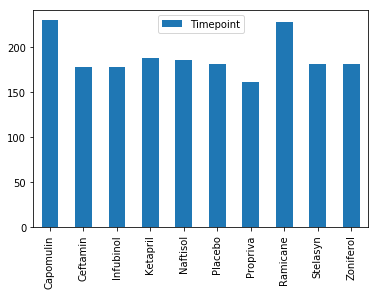

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
y_pos = np.arange(len(datapoint))
plt.bar(y_pos,datapoint["Timepoint"],width=.5)
plt.xticks(y_pos, datapoint.index.values, rotation=90)
plt.xlim(-0.5, 9.5)
plt.legend(datapoint,loc="best")
plt.show()

## Pie plots

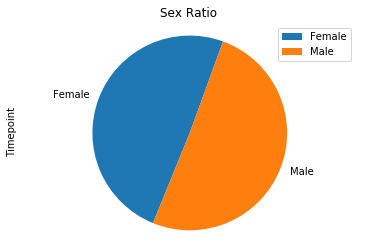

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = data.groupby("Sex").count()
sex_data = sex_data[["Timepoint"]]
sex_data.plot.pie(subplots=True, startangle=70)
plt.title("Sex Ratio")
plt.axis("equal")
plt.show()

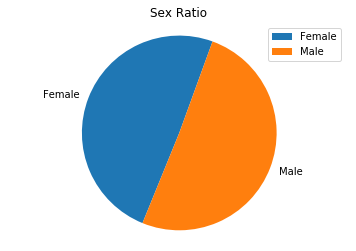

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_data["Timepoint"],labels = sex_data.index.values, startangle = 70)
plt.title("Sex Ratio")
plt.axis("equal")
plt.legend(loc="best")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
best_drug_df = data.loc[(data["Drug Regimen"] == "Capomulin") |
                        (data["Drug Regimen"] == "Ramicane") |
                        (data["Drug Regimen"] == "Ceftamin") |
                        (data["Drug Regimen"] == "Infubinol")
                       ]
best_drug_df = best_drug_df.sort_values("Timepoint", ascending = False)
best_drug_df = best_drug_df.drop_duplicates("Mouse ID")
quant = best_drug_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
inter_quant = quant[.75] - quant[.25]
bound_up = quant[.75] + (1.5 * inter_quant)
bound_low = quant[.25] - (1.5 * inter_quant)
outlier = best_drug_df.loc[(best_drug_df["Tumor Volume (mm3)"] > bound_up) |
                          (best_drug_df["Tumor Volume (mm3)"] < bound_low)]
outlier
# no outliers?

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


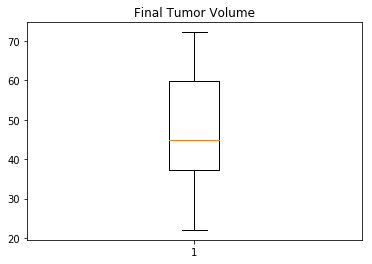

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume")
ax1.boxplot(best_drug_df["Tumor Volume (mm3)"])
plt.show()

## Line and scatter plots

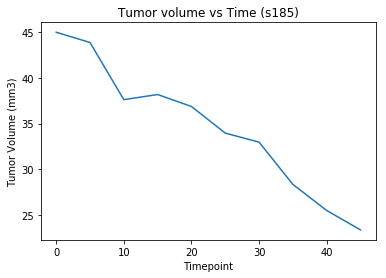

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo = data.loc[(data["Drug Regimen"] == "Capomulin")]
capo_s185 = capo.loc[(capo["Mouse ID"] == "s185")]
plt.plot(capo_s185["Timepoint"],capo_s185["Tumor Volume (mm3)"])
plt.title("Tumor volume vs Time (s185)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

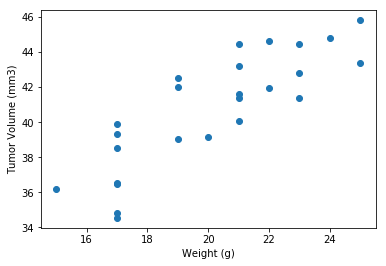

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_weight = capo.groupby(capo["Mouse ID"])["Weight (g)"].mean()
capo_tum_vol = capo.groupby(capo["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(capo_weight,capo_tum_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope,intercept,r_value,p_value,std_err) = st.linregress(capo_weight,capo_tum_vol)
line = (slope * capo_weight) + intercept
print(f'Correltion coefficient for weight vs tumor volume is: {r_value}')

Correltion coefficient for weight vs tumor volume is: 0.8419363424694718


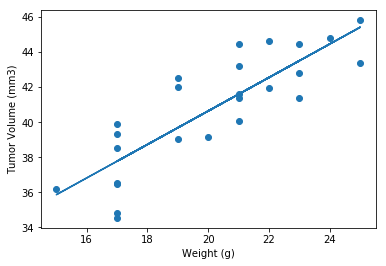

In [12]:
#plot
plt.scatter(capo_weight,capo_tum_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(capo_weight,line)
plt.show()